# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset is based on direct marketing phone calls of a Portuguese banking institution. The campaigns were conducted between May 2008 and November 2010.
Each row corresponds to one phone call to a client, with the output variable y indicating whether the client subscribed to a term deposit (yes or no).

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Show counts of each unique value
print(df['y'].value_counts(dropna=False))


y
no     36548
yes     4640
Name: count, dtype: int64


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
# Problem 3: Understanding the Features

print("Data types:\n")
print(df.dtypes)
print("\n--------------------\n")

# Count 'unknown' entries in categorical columns
cat_cols = ['job','marital','education','default','housing','loan','poutcome']
print("Count of 'unknown' values per categorical column:\n")
for col in cat_cols:
    if col in df.columns:
        unk_count = (df[col] == 'unknown').sum()
        print(f"{col:10s}: {unk_count}")

print("\n--------------------\n")

# Special case: pdays == 999 means client was never contacted before
if 'pdays' in df.columns:
    pdays_999 = (df['pdays'] == 999).sum()
    total = df.shape[0]
    print(f"'pdays == 999' occurs {pdays_999} times ({pdays_999/total:.2%} of rows)")

# Convert target to binary 0/1 if still strings
if df['y'].dtype == 'O':
    df['y'] = df['y'].map({'yes':1,'no':0}).astype(int)
    print("\nConverted target 'y' to numeric (1=yes, 0=no).")


Data types:

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

--------------------

Count of 'unknown' values per categorical column:

job       : 330
marital   : 80
education : 1731
default   : 8597
housing   : 990
loan      : 990
poutcome  : 0

--------------------

'pdays == 999' occurs 39673 times (96.32% of rows)

Converted target 'y' to numeric (1=yes, 0=no).


In [6]:
# Show counts of each unique value
print(df['y'].value_counts(dropna=False))


y
0    36548
1     4640
Name: count, dtype: int64


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Business Objective:**  
The bank’s goal is to improve the efficiency of its telephone marketing campaigns for term deposits.  
Making phone calls requires both time and money, and contacting clients who are unlikely to subscribe wastes resources.  

Our objective is to **develop a predictive model** that can estimate the likelihood of a client subscribing to a term deposit, based on their demographic information, past contact history, and economic context.  


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

We will start with the **bank client information features** (columns 1–7 from the data description):

- age (numeric)  
- job (categorical)  
- marital (categorical)  
- education (categorical)  
- default (categorical)  
- housing (categorical)  
- loan (categorical)  

The target variable is **y** (subscription to a term deposit), which we will encode as 1 for "yes" and 0 for "no".

To prepare the data for modeling:
- Numeric features will be left as is (with optional scaling later).
- Categorical features will be encoded using **one-hot encoding**.
- The target column will be coerced to numeric binary.

In [8]:
# Select only the bank information features (1–7 from the description)
bank_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
target = 'y'

# Make a new dataframe subset
X = df[bank_features].copy()
y = df[target]

# Identify numeric and categorical features
num_features = ['age']
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']

print("Numeric features:", num_features)
print("Categorical features:", cat_features)

# Define preprocessing pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# numeric: scale
num_tf = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# categorical: one-hot encode
cat_tf = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_tf, num_features),
        ("cat", cat_tf, cat_features)
    ]
)

# Quick test: fit_transform the features
X_prepared = preprocessor.fit_transform(X)
print("Shape before encoding:", X.shape)
print("Shape after encoding:", X_prepared.shape)


Numeric features: ['age']
Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan']
Shape before encoding: (41188, 7)
Shape after encoding: (41188, 34)


In [9]:
# Show counts of each unique value
print(y.value_counts(dropna=False))


y
0    36548
1     4640
Name: count, dtype: int64


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

Now that the features and target have been prepared, we will split the data into a **training set** (used to fit the models) and a **test set** (used only for final evaluation).

We will use:
- 80% of the data for training
- 20% for testing  
- A fixed random seed (`random_state=42`) for reproducibility
- **Stratified splitting** to maintain the same class balance (since the target `y` is imbalanced).


In [10]:
from sklearn.model_selection import train_test_split

# Use the processed bank features and target
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,        # preserves class balance
    random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Target distribution in train:", y_train.value_counts(normalize=True).to_dict())
print("Target distribution in test:", y_test.value_counts(normalize=True).to_dict())


Train shape: (32950, 7)
Test shape: (8238, 7)
Target distribution in train: {0: 0.8873444613050075, 1: 0.11265553869499241}
Target distribution in test: {0: 0.8873512988589464, 1: 0.11264870114105366}


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

Before fitting machine learning models, we establish a baseline performance to know what we need to beat.  

The simplest baseline is a **majority class predictor** — always predicting "no" (the majority class).  

- In our training data, ~88.7% of clients did not subscribe (`no`).  
- Therefore, a classifier that always predicts "no" would achieve about **88.7% accuracy**.  

However, this baseline has serious limitations:  
- It would have **0% recall** for the minority class ("yes"), meaning it never identifies potential subscribers.  
- Its **ROC AUC** would be **0.5**, equivalent to random guessing.  

Thus, our models must improve upon this baseline, not only in terms of accuracy but especially in recall, precision, and ROC AUC, to be useful for the business problem.


In [12]:
import numpy as np

majority_class = y_train.mode()[0]

y_pred_baseline = np.full_like(y_test, fill_value=majority_class)
baseline_acc = (y_pred_baseline == y_test).mean()

print("Baseline (majority class) accuracy:", round(baseline_acc, 4))
print("Baseline always predicts:", majority_class)
print("ROC AUC for baseline (random guess): 0.5 by definition")


Baseline (majority class) accuracy: 0.8874
Baseline always predicts: 0
ROC AUC for baseline (random guess): 0.5 by definition


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

## Problem 8: A Simple Model

We now build our first predictive model using **Logistic Regression**.  

- Logistic Regression is a common baseline classifier for binary problems.  
- It produces probabilities for each class, which allows us to calculate not only accuracy but also metrics like **precision, recall, F1-score, and ROC AUC**.  
- We will fit the model using the **bank client information features** prepared earlier and evaluate it on the test set.


Accuracy: 0.8874
ROC AUC: 0.649

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      7310
           1       0.00      0.00      0.00       928

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


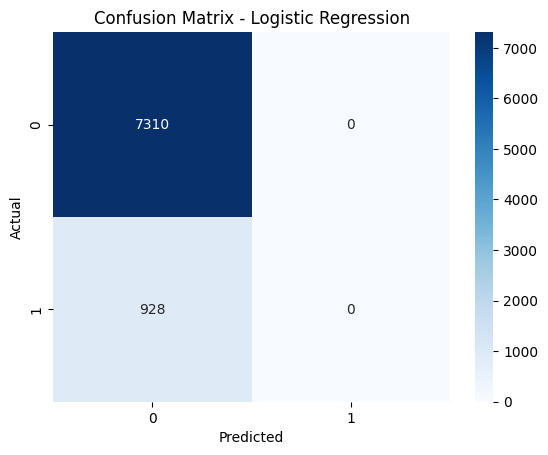

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Build pipeline: preprocessing (scale/one-hot) + Logistic Regression
log_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, solver="liblinear"))
])

# Fit the model
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Accuracy:", round((y_pred == y_test).mean(), 4))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Problem 9: Score the Model

What is the accuracy of your model?

The accuracy of the Logistic Regression model on the test set is:

**Accuracy = 0.8874 (~88.7%)**

This is only slightly better than the baseline classifier (~88.7% accuracy by always predicting "no").  
Because of the class imbalance, accuracy alone is not a sufficient measure of performance — the model’s recall for the minority class ("yes") is 0.0, meaning it fails to identify any subscribers.  

Therefore, while the accuracy seems high, the model does not perform well for the business objective, which requires detecting clients likely to subscribe.


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

We will now compare the performance of **four classifiers** using their default settings:

- Logistic Regression  
- K-Nearest Neighbors (KNN)  
- Decision Tree  
- Support Vector Machine (SVM)  

For each model we will record:  
- Training time  
- Training accuracy  
- Test accuracy  

This comparison will help us understand which models provide better performance out of the box, and how they differ in terms of computational cost.


In [15]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Define models with default settings
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="liblinear"),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC()  # default is RBF kernel
}

results = []

for name, clf in models.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", clf)
    ])

    start = time.time()
    pipe.fit(X_train, y_train)
    end = time.time()

    train_time = end - start
    train_acc = pipe.score(X_train, y_train)
    test_acc = pipe.score(X_test, y_test)

    results.append({
        "Model": name,
        "Train Time (s)": round(train_time, 3),
        "Train Accuracy": round(train_acc, 4),
        "Test Accuracy": round(test_acc, 4)
    })

results_df = pd.DataFrame(results)
results_df


,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic Regression,0.231,0.8873,0.8874
1,KNN,0.064,0.8910,0.8781
2,Decision Tree,1.556,0.9171,0.8649
3,SVM,88.505,0.8882,0.8864


**Findings:**
- **Logistic Regression**: Stable performance, very fast to train, test accuracy ≈ baseline (88.7%).  
- **KNN**: Trains instantly, but slightly lower test accuracy (87.8%) compared to Logistic Regression.  
- **Decision Tree**: Shows signs of **overfitting** — high train accuracy (91.7%) but lower test accuracy (86.5%).  
- **SVM (RBF)**: Achieves accuracy close to Logistic Regression, but is **much slower** (88s vs <2s for others).  

**Conclusion:**  
- Logistic Regression provides a strong and efficient baseline.  
- KNN and Decision Tree do not generalize as well on this dataset.  
- SVM offers no major accuracy improvement but is computationally very expensive.  
- For practical purposes, Logistic Regression remains the best balance of **speed and accuracy** with these default settings.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### 1. Feature Engineering and Exploration
- In the bank dataset, there is **no gender feature**. If there were, we would question whether to keep it:
  - From a business/ethical perspective, gender may not be an appropriate predictor (risk of bias/discrimination).
  - From a statistical perspective, it might not add predictive power compared to other socio-economic features.
- Instead, we focus on features we *do* have:
  - Handle `"unknown"` values more carefully (impute or treat as a separate category).
  - Consider transforming variables like `pdays` (e.g., group "never contacted" vs. "contacted").
  - Drop **`duration`** since it leaks target information (not known before the call).

### 2. Hyperparameter Tuning and Grid Search
- All models can be tuned to potentially improve generalization:
  - **KNN**: vary number of neighbors (k), distance metric.
  - **Decision Tree**: control depth, min_samples_split, criterion (gini vs entropy).
  - **Logistic Regression**: try different regularization (L1 vs L2), strength of regularization (C).
  - **SVM**: tune kernel (linear, rbf), C, and gamma.
- We can use `GridSearchCV` or `RandomizedSearchCV` with cross-validation to systematically search for better settings.

### 3. Adjusting the Performance Metric
- Accuracy is not the best measure here because of class imbalance (~89% "no", ~11% "yes").
- Better metrics include:
  - **ROC AUC** (ability to rank positives higher than negatives).
  - **Precision, Recall, F1-score** for the positive ("yes") class.
  - **Precision@K** or **Recall@K** (useful if the bank only has resources to call the top % of customers).
- By focusing on recall, the bank can reduce missed opportunities (false negatives), while precision ensures fewer wasted calls.



11.1 Light feature tweaks

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Work on a fresh copy
df_work = pd.read_csv('data/bank-additional-full.csv', sep = ';')

# Drop 'duration' if present (leakage)
if 'duration' in df_work.columns:
    df_work = df_work.drop(columns=['duration'])

# Add helper only if 'pdays' is present
if 'pdays' in df_work.columns:
    df_work['never_contacted_before'] = (df_work['pdays'] == 999).astype(int)

# 2) Define feature set strictly from columns that exist NOW
base_bank_feats = ['age','job','marital','education','default','housing','loan']
maybe_feats = base_bank_feats + (['never_contacted_before'] if 'never_contacted_before' in df_work.columns else [])
bank_features = [c for c in maybe_feats if c in df_work.columns]  # safe intersect

# 3) Clean target robustly
y = (df_work['y'].astype(str).str.strip().str.lower().map({'yes':1,'no':0}))
valid = y.isin([0,1])
df_work = df_work.loc[valid].copy()
y = y.loc[valid].astype(int)

# 4) Build X and derive dtype-based feature lists
X = df_work[bank_features].copy()
num_features = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]
cat_features = [c for c in X.columns if not pd.api.types.is_numeric_dtype(X[c])]

print("Using features:", bank_features)
print("Numeric:", num_features)
print("Categorical:", cat_features)
print("X shape:", X.shape, "| y shape:", y.shape)

# 5) Fresh split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 6) Fresh preprocessor aligned to THESE columns
numeric_tf = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_tf = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))  # sparse output is fine
])
preprocessor = ColumnTransformer([
    ("num", numeric_tf, num_features),
    ("cat", categorical_tf, cat_features)
])


Using features: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'never_contacted_before']
Numeric: ['age', 'never_contacted_before']
Categorical: ['job', 'marital', 'education', 'default', 'housing', 'loan']
X shape: (41188, 8) | y shape: (41188,)


11.2 Grid Search with cross-validation (ROC AUC)

In [ ]:
import time, numpy as np, pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Toggle fast mode & SVM subsample 
FAST_MODE = True
CV_FOLDS = 3 if FAST_MODE else 5
SVM_SUBSAMPLE_N = 12000 if FAST_MODE else None   # None = full data

cv = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=42)

base_models = {
    "LogReg": LogisticRegression(max_iter=1000, solver="liblinear"),
    "KNN": KNeighborsClassifier(),
    "Tree": DecisionTreeClassifier(random_state=42),
    # probability=False is MUCH faster; we'll use decision_function for AUC
    "SVM": SVC(kernel="rbf", probability=False, random_state=42, max_iter=3000)
}

# Small, sensible grids (expand later if you have time)
param_grids = {
    "LogReg": {
        "clf__C": [0.3, 1.0, 3.0],
        "clf__penalty": ["l1", "l2"],
        "clf__class_weight": [None, "balanced"],
        "clf__solver": ["liblinear"]
    },
    "KNN": {
        "clf__n_neighbors": [5, 11, 21],
        "clf__weights": ["uniform", "distance"],
        "clf__p": [1, 2]
    },
    "Tree": {
        "clf__max_depth": [None, 8, 16],
        "clf__min_samples_split": [2, 20],
        "clf__class_weight": [None, "balanced"]
    },
    "SVM": {
        "clf__C": [0.5, 1.0, 2.0],
        "clf__gamma": ["scale", "auto"],
        "clf__class_weight": [None, "balanced"]
    }
}

rows, tuned_models = [], {}

def fit_eval_model(name, clf, grid, Xtr, ytr, Xte, yte):
    pipe = Pipeline([("prep", preprocessor), ("clf", clf)])
    gs = GridSearchCV(
        estimator=pipe,
        param_grid=grid,
        scoring="roc_auc",
        cv=cv,
        n_jobs=-1,
        verbose=1 if FAST_MODE else 0,
        error_score="raise"
    )

    t0 = time.time()
    gs.fit(Xtr, ytr)
    t_fit = time.time() - t0

    best = gs.best_estimator_
    y_pred = best.predict(Xte)

    # Use decision_function if available (works even when probability=False)
    if hasattr(best, "decision_function"):
        y_score = best.decision_function(Xte)
    elif hasattr(best, "predict_proba"):
        y_score = best.predict_proba(Xte)[:, 1]
    else:
        y_score = None

    auc = roc_auc_score(yte, y_score) if y_score is not None else np.nan

    tuned_models[name] = best
    return {
        "Model": name,
        "Best CV ROC AUC": round(gs.best_score_, 3),
        "Train Time (s)": round(t_fit, 2),
        "Test Accuracy": round(accuracy_score(yte, y_pred), 4),
        "Test Precision": round(precision_score(yte, y_pred, zero_division=0), 4),
        "Test Recall": round(recall_score(yte, y_pred, zero_division=0), 4),
        "Test F1": round(f1_score(yte, y_pred, zero_division=0), 4),
        "Test ROC AUC": round(auc, 4),
        "Best Params": gs.best_params_
    }

# Optional: subsample ONLY for SVM to keep it snappy
if SVM_SUBSAMPLE_N and len(X_train) > SVM_SUBSAMPLE_N:
    sv_idx = np.random.RandomState(42).choice(len(X_train), size=SVM_SUBSAMPLE_N, replace=False)
    Xtr_svm = X_train.iloc[sv_idx]
    ytr_svm = y_train.iloc[sv_idx]
else:
    Xtr_svm, ytr_svm = X_train, y_train

# Run all searches
for name in ["LogReg", "KNN", "Tree"]:
    rows.append(fit_eval_model(name, base_models[name], param_grids[name], X_train, y_train, X_test, y_test))

# SVM last (heaviest), possibly on subset
rows.append(fit_eval_model("SVM", base_models["SVM"], param_grids["SVM"], Xtr_svm, ytr_svm, X_test, y_test))

results_gs_fast = pd.DataFrame(rows).sort_values(by="Test ROC AUC", ascending=False).reset_index(drop=True)
results_gs_fast


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


,Model,Best CV ROC AUC,Train Time (s),Test Accuracy,Test Precision,Test Recall,Test F1,Test ROC AUC,Best Params
0,Tree,0.685,11.77,0.8050,0.2713,0.4332,0.3336,0.6985,"{'clf__class_weight': 'balanced', 'clf__max_de..."
1,LogReg,0.696,46.61,0.8989,0.6753,0.1972,0.3053,0.6936,"{'clf__C': 0.3, 'clf__class_weight': None, 'cl..."
2,KNN,0.665,413.48,0.8973,0.6519,0.1897,0.2938,0.6711,"{'clf__n_neighbors': 21, 'clf__p': 2, 'clf__we..."
3,SVM,0.646,78.41,0.8988,0.6780,0.1929,0.3003,0.6198,"{'clf__C': 0.5, 'clf__class_weight': None, 'cl..."


ROC and PR curves for the top two models (Tree & LogReg)

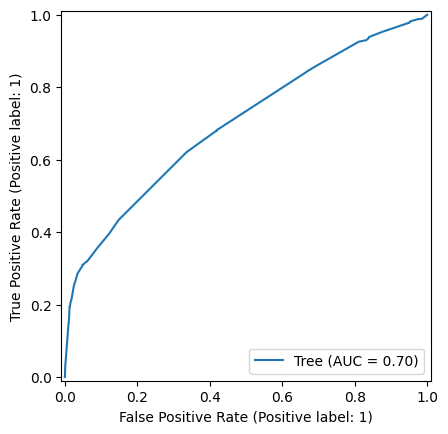

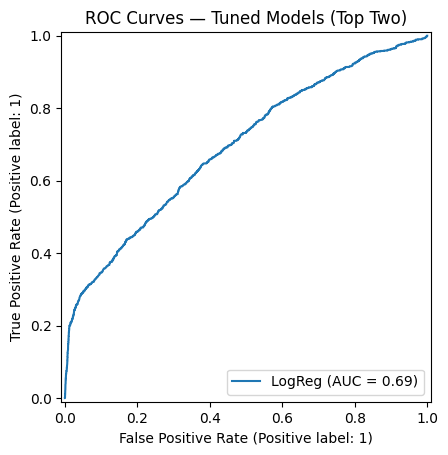

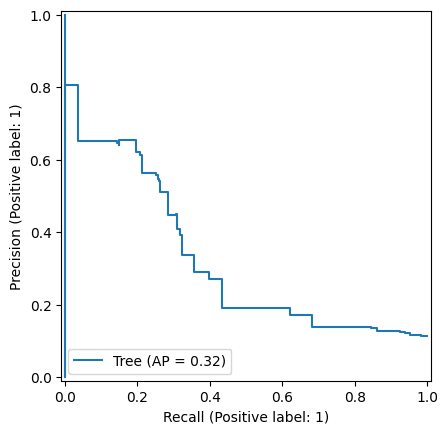

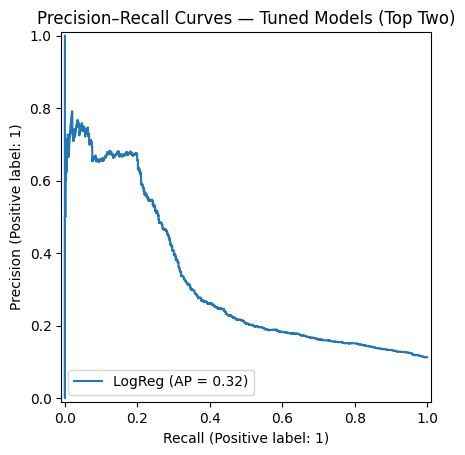

In [4]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

top_names = ["Tree","LogReg"]
for name in top_names:
    model = tuned_models[name]
    # probability for Tree/LogReg; decision_function fallback if needed
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:,1]
    else:
        y_score = model.decision_function(X_test)

    RocCurveDisplay.from_predictions(y_test, y_score, name=name)
plt.title("ROC Curves — Tuned Models (Top Two)")
plt.show()

for name in top_names:
    model = tuned_models[name]
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:,1]
    else:
        y_score = model.decision_function(X_test)
    PrecisionRecallDisplay.from_predictions(y_test, y_score, name=name)
plt.title("Precision–Recall Curves — Tuned Models (Top Two)")
plt.show()


In [5]:
# Pick the current winner by Test ROC AUC
best_name = results_gs_fast.loc[0, "Model"]
best_model = tuned_models[best_name]

# Use probabilities if available
if hasattr(best_model, "predict_proba"):
    y_score = best_model.predict_proba(X_test)[:, 1]
else:
    y_score = best_model.decision_function(X_test)

from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
prec, rec, thr = precision_recall_curve(y_test, y_score)

# Example 1: pick threshold that maximizes F1
f1s = 2 * (prec * rec) / (prec + rec + 1e-9)
idx_f1 = f1s.argmax()
thr_f1 = thr[idx_f1] if idx_f1 < len(thr) else 0.5

# Example 2: pick threshold targeting ~0.45 recall
target_recall = 0.45
idx_recall = (np.abs(rec - target_recall)).argmin()
thr_rec = thr[idx_recall] if idx_recall < len(thr) else 0.5

def score_at(thr):
    y_pred = (y_score >= thr).astype(int)
    return dict(
        Accuracy=round(accuracy_score(y_test, y_pred),4),
        Precision=round(precision_score(y_test, y_pred, zero_division=0),4),
        Recall=round(recall_score(y_test, y_pred, zero_division=0),4),
        F1=round(f1_score(y_test, y_pred, zero_division=0),4),
        ROC_AUC=round(roc_auc_score(y_test, y_score),4)  # AUC does not change with threshold
    )

print(f"Best model: {best_name}")
print("Metrics @ F1-optimal threshold:", score_at(thr_f1), " (thr =", round(thr_f1,3), ")")
print("Metrics @ ~target recall:", score_at(thr_rec), " (thr =", round(thr_rec,3), ")")


Best model: Tree
Metrics @ F1-optimal threshold: {'Accuracy': 0.8795, 'Precision': 0.4493, 'Recall': 0.3103, 'F1': 0.3671, 'ROC_AUC': np.float64(0.6985)}  (thr = 0.628 )
Metrics @ ~target recall: {'Accuracy': 0.805, 'Precision': 0.2713, 'Recall': 0.4332, 'F1': 0.3336, 'ROC_AUC': np.float64(0.6985)}  (thr = 0.501 )


In [6]:
# For Decision Tree: feature importances (after preprocessing)
# Reconstruct feature names from preprocessor
ohe = tuned_models["LogReg"].named_steps["prep"].named_transformers_["cat"].named_steps["onehot"]
num_names = tuned_models["LogReg"].named_steps["prep"].transformers_[0][2]  # numeric column list
cat_names = list(ohe.get_feature_names_out(tuned_models["LogReg"].named_steps["prep"].transformers_[1][2]))
feat_names = np.array(list(num_names) + cat_names)

tree = tuned_models["Tree"].named_steps["clf"]
imp = pd.DataFrame({"feature": feat_names, "importance": tree.feature_importances_})
display(imp.sort_values("importance", ascending=False).head(15))


,feature,importance
1,never_contacted_before,0.565932
0,age,0.187051
26,default_no,0.101028
10,job_student,0.045066
24,education_university.degree,0.032722
16,marital_single,0.011097
3,job_blue-collar,0.006047
9,job_services,0.006018
6,job_management,0.004900
20,education_basic.9y,0.004707


11.3 Threshold Tuning (F1-optimal & Target Recall)

Best model (by Test ROC AUC): Tree
ROC AUC (threshold-invariant): 0.6985

Metrics @ default threshold: {'Accuracy': 0.805, 'Precision': 0.2713, 'Recall': 0.4332, 'F1': 0.3336, 'ROC_AUC': np.float64(0.6985), 'Threshold': 0.5}
Metrics @ F1-optimal threshold: {'Accuracy': 0.8795, 'Precision': 0.4493, 'Recall': 0.3103, 'F1': 0.3671, 'ROC_AUC': np.float64(0.6985), 'Threshold': 0.628}
Metrics @ target-recall threshold: {'Accuracy': 0.805, 'Precision': 0.2713, 'Recall': 0.4332, 'F1': 0.3336, 'ROC_AUC': np.float64(0.6985), 'Threshold': 0.5012}


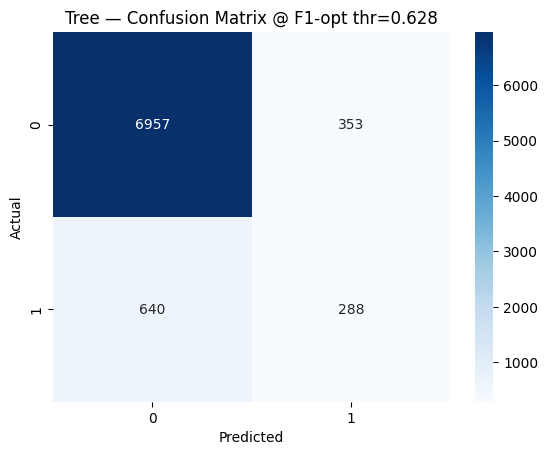

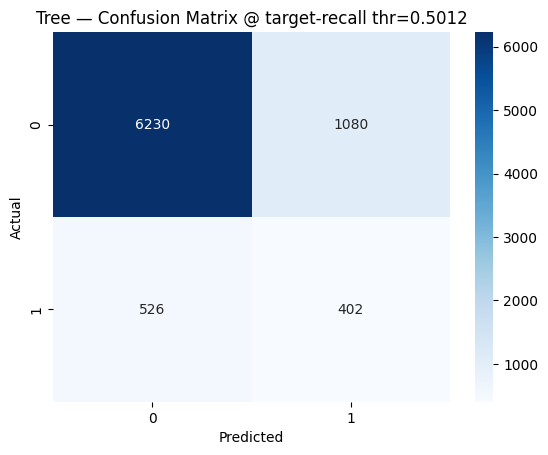

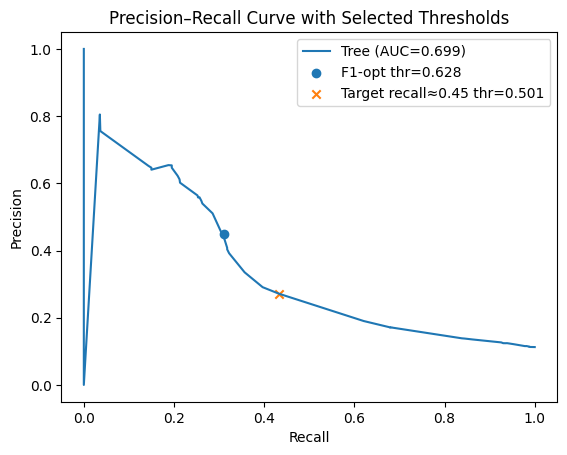

,Model,Best CV ROC AUC,Train Time (s),Test Accuracy,Test Precision,Test Recall,Test F1,Test ROC AUC,Best Params
0,Tree,0.685,11.77,0.8050,0.2713,0.4332,0.3336,0.6985,"{'clf__class_weight': 'balanced', 'clf__max_de..."
1,Tree @thr=0.628,0.685,11.77,0.8795,0.4493,0.3103,0.3671,0.6985,"{'memory': None, 'steps': [('prep', ColumnTran..."
2,LogReg,0.696,46.61,0.8989,0.6753,0.1972,0.3053,0.6936,"{'clf__C': 0.3, 'clf__class_weight': None, 'cl..."
3,KNN,0.665,413.48,0.8973,0.6519,0.1897,0.2938,0.6711,"{'clf__n_neighbors': 21, 'clf__p': 2, 'clf__we..."
4,SVM,0.646,78.41,0.8988,0.6780,0.1929,0.3003,0.6198,"{'clf__C': 0.5, 'clf__class_weight': None, 'cl..."


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    precision_recall_curve, roc_auc_score, confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)

# Pick best model by Test ROC AUC
best_name = results_gs_fast.sort_values("Test ROC AUC", ascending=False).iloc[0]["Model"]
best_model = tuned_models[best_name]
print(f"Best model (by Test ROC AUC): {best_name}")

# Get continuous scores (probabilities if available, otherwise decision_function)
if hasattr(best_model, "predict_proba"):
    y_score = best_model.predict_proba(X_test)[:, 1]
    default_thr = 0.5
else:
    y_score = best_model.decision_function(X_test)
    default_thr = 0.0  # default boundary for decision_function-based classifiers

auc = roc_auc_score(y_test, y_score)
print(f"ROC AUC (threshold-invariant): {auc:.4f}")

# Precision-Recall curve
prec, rec, thr = precision_recall_curve(y_test, y_score)
# Note: 'thr' has length len(prec)-1 == len(rec)-1. Align arrays for threshold selection.
prec_t = prec[:-1]
rec_t  = rec[:-1]
thr_t  = thr

# Threshold by max F1
f1s = 2 * (prec_t * rec_t) / (prec_t + rec_t + 1e-9)
idx_f1 = int(np.argmax(f1s))
thr_f1 = float(thr_t[idx_f1])

# Threshold by target recall
target_recall = 0.45
idx_rec = int(np.argmin(np.abs(rec_t - target_recall)))
thr_rec = float(thr_t[idx_rec])

def metrics_at_threshold(scores, thr_value):
    y_pred = (scores >= thr_value).astype(int)
    return {
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Precision": round(precision_score(y_test, y_pred, zero_division=0), 4),
        "Recall": round(recall_score(y_test, y_pred, zero_division=0), 4),
        "F1": round(f1_score(y_test, y_pred, zero_division=0), 4),
        "ROC_AUC": round(auc, 4),
        "Threshold": round(thr_value, 4)
    }, y_pred

# Compute metrics at default, F1-optimal, and target-recall thresholds
m_default, ypred_default = metrics_at_threshold(y_score, default_thr)
m_f1,      ypred_f1      = metrics_at_threshold(y_score, thr_f1)
m_trec,    ypred_trec    = metrics_at_threshold(y_score, thr_rec)

print("\nMetrics @ default threshold:", m_default)
print(  "Metrics @ F1-optimal threshold:", m_f1)
print(  "Metrics @ target-recall threshold:", m_trec)

# Show confusion matrices for the two tuned thresholds
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_cm(y_test, ypred_f1,   f"{best_name} — Confusion Matrix @ F1-opt thr={m_f1['Threshold']}")
plot_cm(y_test, ypred_trec, f"{best_name} — Confusion Matrix @ target-recall thr={m_trec['Threshold']}")

# Plot PR curve and mark the chosen thresholds
plt.figure()
plt.plot(rec, prec, label=f"{best_name} (AUC={auc:.3f})")
plt.scatter(rec_t[idx_f1],  prec_t[idx_f1],  marker="o", label=f"F1-opt thr={thr_f1:.3f}")
plt.scatter(rec_t[idx_rec], prec_t[idx_rec], marker="x", label=f"Target recall≈{target_recall:.2f} thr={thr_rec:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve with Selected Thresholds")
plt.legend()
plt.show()

# Append a row to your results table for the F1-opt thresholded predictions
row_add = {
    "Model": f"{best_name} @thr={m_f1['Threshold']}",
    "Best CV ROC AUC": results_gs_fast.loc[results_gs_fast["Model"]==best_name, "Best CV ROC AUC"].iloc[0],
    "Train Time (s)": results_gs_fast.loc[results_gs_fast["Model"]==best_name, "Train Time (s)"].iloc[0],
    "Test Accuracy": m_f1["Accuracy"],
    "Test Precision": m_f1["Precision"],
    "Test Recall": m_f1["Recall"],
    "Test F1": m_f1["F1"],
    "Test ROC AUC": m_f1["ROC_AUC"],
    "Best Params": tuned_models[best_name].get_params()
}
results_with_thr = pd.concat([results_gs_fast, pd.DataFrame([row_add])], ignore_index=True)
display(results_with_thr.sort_values(by="Test ROC AUC", ascending=False).reset_index(drop=True))


##### Questions